In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

#reading from csv and overview

import os
cwd = os.getcwd()
print(cwd)
os.chdir('C://Users//john8/Year 4/Data Analysis')

data= pd.read_csv("ufc-fighters-statistics.csv")

data.info()
data.head()
data.describe()

C:\Users\john8\Year 4\Data Analysis
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth              

,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,3813.000000,4024.000000,2184.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,12.366821,5.726344,0.264413,178.234325,77.395825,181.808874,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,9.374667,5.103768,0.822373,8.888050,17.982242,10.680804,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,152.400000,47.630000,147.320000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,2.000000,0.000000,172.720000,65.770000,175.260000,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,11.000000,5.000000,0.000000,177.800000,77.110000,182.880000,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,17.000000,8.000000,0.000000,185.420000,83.910000,190.500000,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,253.000000,83.000000,11.000000,226.060000,349.270000,213.360000,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


<class 'pandas.core.frame.DataFrame'>
Index: 2183 entries, 4 to 4110
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   name                                     2183 non-null   object 
 1   nickname                                 1516 non-null   object 
 2   wins                                     2183 non-null   int64  
 3   losses                                   2183 non-null   int64  
 4   draws                                    2183 non-null   int64  
 5   height_cm                                2183 non-null   float64
 6   weight_in_kg                             2183 non-null   float64
 7   reach_in_cm                              2183 non-null   float64
 8   significant_strikes_landed_per_minute    2183 non-null   float64
 9   significant_strikes_absorbed_per_minute  2183 non-null   float64
 10  takedown_accuracy                        2183 non-nul

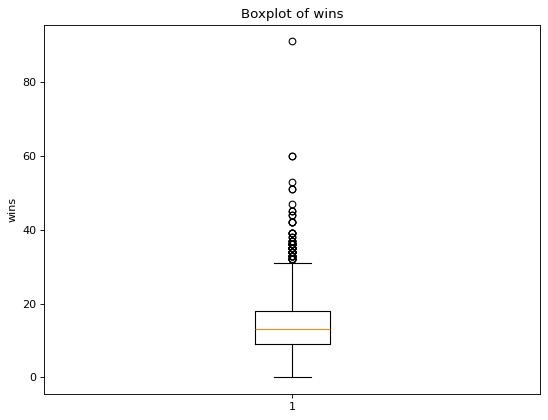

Number of rows before dropping wins outlier: 2183
Number of rows after dropping wins outlier: 2182


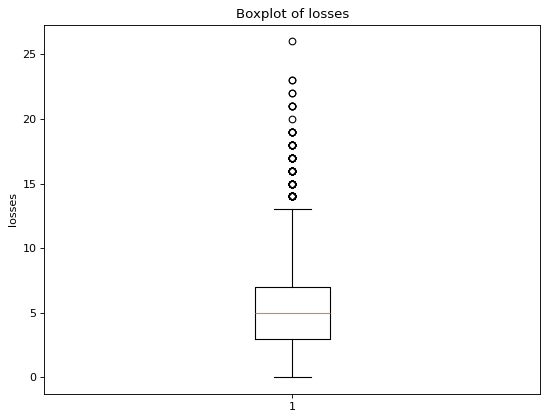

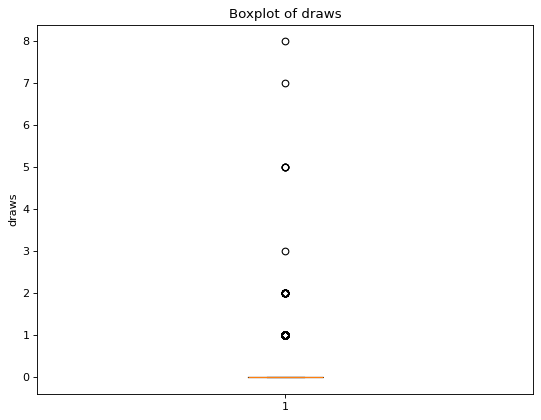

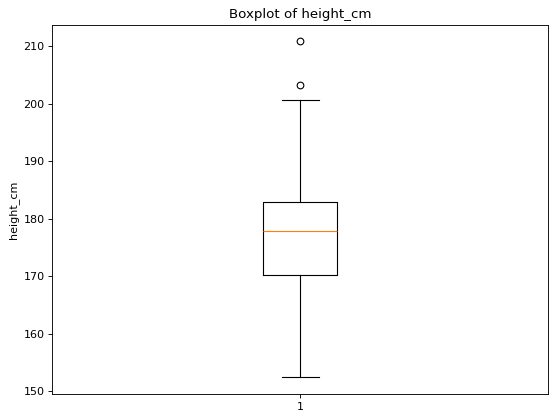

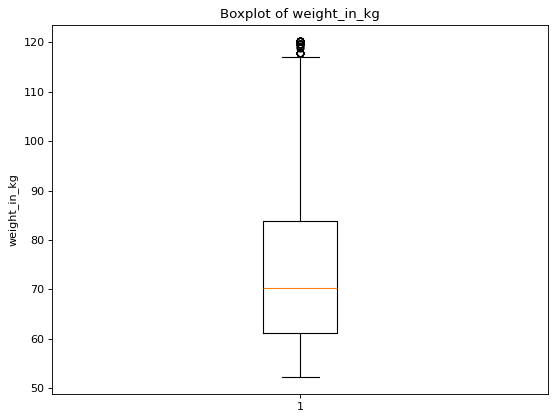

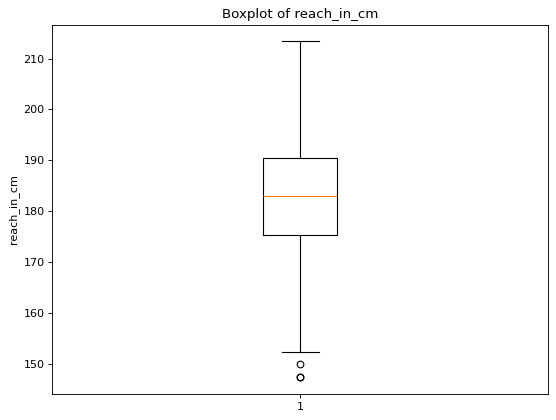

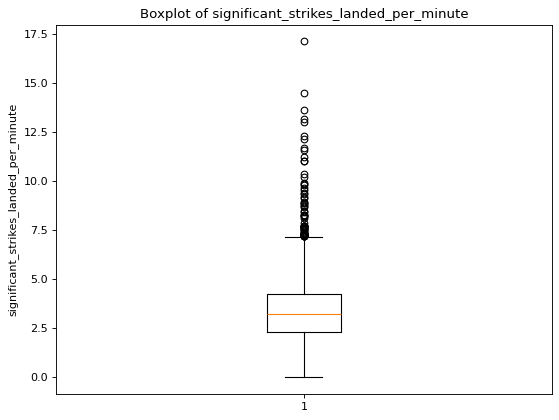

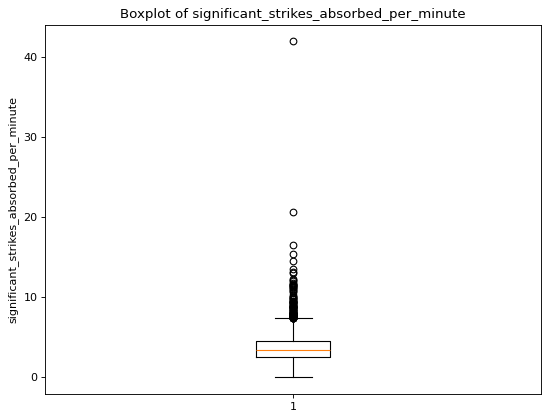

Number of rows before dropping wins outlier: 2182
Number of rows after dropping wins outlier: 2181


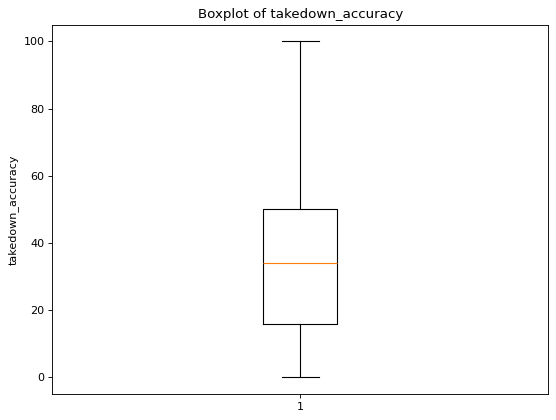

In [41]:
#Data cleaning

#Check for null values
data.isnull().sum() 

#height_cm                                        298
#weight_in_kg                                      87
#reach_in_cm                                     1927

#decide to drop rows where above are null

data.dropna(subset=['height_cm', 'weight_in_kg', 'reach_in_cm'], inplace=True)

data.isnull().sum()

#Keep or drop varaibles

#name - keep for reference but exclude from analysis
#nickname - keep for reference but exclude from analysis
#wins, losses, draws - keep as important factor for analysis
#height_cm, wight_in_kg, reach_in_cm - physical attributes important for analysis - keep
#stance - based on data overhead, 60% orthodox 20% null 19% other - decide to drop - not important
#date_of_birth - drop as not relevant

#significant_strikes_landed_per_minute, significant_striking_accuracy, significant_strikes_absorbed_per_minute, significant_strike_defence
#average_takedowns_landed_per_15_minutes, takedown_accuracy, takedown_defense, average_submissions_attempted_per_15_minutes                                                                                                                                  
#after careful consideration only keep what i think is top 3 most important factors
#keep significant_strikes_landed_per_minute, significant_strikes_absorbed_per_minute, takedown_accuracy
#above variables most relevant to a fighter's performance in terms of offensive and defensive capabilities

#drop columns
columns_to_drop = ['stance', 'date_of_birth', 'significant_striking_accuracy', 'significant_strike_defence', 
                   'average_takedowns_landed_per_15_minutes', 'takedown_defense', 
                   'average_submissions_attempted_per_15_minutes']
data.drop(columns=columns_to_drop, inplace=True)

data.info()
data.head()
data.describe()

#round all values in the dataframe to two decimal places
data = data.round(2)

#check updated dataframe
print(data.head())

#OUTLIERS ############################################################

#Wins
#See if theres outliers for the Wins
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.wins)
plt.title("Boxplot of wins")
plt.ylabel("wins")
plt.show()

#one person with 80+ wins decide to drop
outlier_index = data[data['wins'] > 80].index
print("Number of rows before dropping wins outlier:", len(data))
#drop row with the outlier value
data.drop(index=outlier_index, inplace=True)
#confirm row has been dropped
print("Number of rows after dropping wins outlier:", len(data))

#Losses
#See if theres outliers for the Losses - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.losses)
plt.title("Boxplot of losses")
plt.ylabel("losses")
plt.show()

#Draws
#See if theres outliers for the Draws - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.draws)
plt.title("Boxplot of draws")
plt.ylabel("draws")
plt.show()

#height_cm
#See if theres outliers for the height_cm - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.height_cm)
plt.title("Boxplot of height_cm")
plt.ylabel("height_cm")
plt.show()

#weight_in_kg
#See if theres outliers for the weight_in_kg - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.weight_in_kg)
plt.title("Boxplot of weight_in_kg")
plt.ylabel("weight_in_kg")
plt.show()

#reach_in_cm
#See if theres outliers for the reach_in_cm - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.reach_in_cm)
plt.title("Boxplot of reach_in_cm")
plt.ylabel("reach_in_cm")
plt.show()

#significant_strikes_landed_per_minute
#See if theres outliers for the significant_strikes_landed_per_minute - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.significant_strikes_landed_per_minute)
plt.title("Boxplot of significant_strikes_landed_per_minute")
plt.ylabel("significant_strikes_landed_per_minute")
plt.show()

#significant_strikes_absorbed_per_minute
#See if theres outliers for the significant_strikes_absorbed_per_minute - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.significant_strikes_absorbed_per_minute)
plt.title("Boxplot of significant_strikes_absorbed_per_minute")
plt.ylabel("significant_strikes_absorbed_per_minute")
plt.show()

#one person with 40+ absorbed strikes per minute - decide to drop as outlier
outlier_index = data[data['significant_strikes_absorbed_per_minute'] > 40].index
print("Number of rows before dropping significant_strikes_absorbed_per_minute outlier:", len(data))
#drop row with the outlier value
data.drop(index=outlier_index, inplace=True)
#confirm row has been dropped
print("Number of rows after dropping significant_strikes_absorbed_per_minute outlier:", len(data))

#takedown_accuracy
#See if theres outliers for the takedown_accuracy - its ok
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(x=data.takedown_accuracy)
plt.title("Boxplot of takedown_accuracy")
plt.ylabel("takedown_accuracy")
plt.show()